In [7]:
import numpy as np
import scipy as sp
import scipy.linalg as la
import matplotlib.pyplot as plt 

# 积分

In [2]:
from scipy.integrate import quad, dblquad, tplquad

In [4]:
#定义一个简单的被积函数,一重积分
def f(x): 
    return x
x_lower = 0
x_upper = 1
val, abserr = quad(f,x_lower,x_upper)
print "integral value =", val, ", absolute error =", abserr 


integral value = 0.5 , absolute error = 5.55111512313e-15


In [12]:
#对于简单的函数，可以使用lambda函数代替被积函数
val,abserr = quad(lambda x:sp.exp(-x**2),-sp.Inf,sp.Inf)
print "numerical  =", val, abserr
analytical = sp.sqrt(sp.pi)
print "analytical =", analytical

numerical  = 1.77245385091 1.42026367809e-08
analytical = 1.77245385091


In [14]:
#定义一个被积函数，二重积分
def integrand(x, y):
    return sp.exp(-x**2-y**2)
x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10
val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)
print val, abserr 

0.785398163397 1.63822994214e-13


# 常微分方程（ODEs）

SciPy的提供了两种不同的方法来解决微分方程：基于函数 **odeint**的API和基于类**ode**面向对象的API。通常odeint更容易上手，但ode类提供一些更精细的控制。
在这里，我们将使用odeint函数。 有关类ode的详细信息，我们可以查询help(ode) 。 它和odeint 函数几乎能做同样的事情，但它是面向对象的。
要使用odeint函数，我们要先导入scipy.integrate模块

In [16]:
from scipy.integrate import odeint,ode

阻尼震荡的运动方程为：
$$\frac{d^2x}{dt^2}+2 ζ w_0 \frac{dx}{dt} +{w_0}^2 x = 0 $$
这里 x 是振荡的位置， ω0 是振荡频率, ζ 阻尼系数. 为了写出二阶微分方程的标准型，我们引入
$$p = \frac{dx}{dt}$$
所以有
$$\frac{dp}{dt} = -2 ζ w_0 -{w_0}^2 x$$
$$p = \frac{dx}{dt}$$

In [29]:
def dy(y, t, zeta, w0):
    """
    右边的常微分方程
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

# 初始状态: 
y0 = [1.0, 0.0]
# 时间坐标
t = sp.linspace(0, 10, 1000)
w0 = 2*sp.pi*1.0
# 三个不同的阻尼系数
y1 = odeint(dy, y0, t, args=(0.0, w0)) # 无阻尼
y2 = odeint(dy, y0, t, args=(0.2, w0)) # 欠阻尼
y3 = odeint(dy, y0, t, args=(1.0, w0)) # 临街阻尼
y4 = odeint(dy, y0, t, args=(5.0, w0)) # 过阻尼
# 画图
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();
fig.show()

# 傅里叶变换

In [9]:
from scipy.fftpack import *

# 线性代数

In [15]:
#解线性方程组
#Ax=b
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([1,2,3])
x = la.solve(A,b)
print x
#检验
print sp.dot(A,x) - b        

[-0.33333333  0.66666667  0.        ]
[ -1.11022302e-16   0.00000000e+00   0.00000000e+00]


In [21]:
#特征值和特征向量
#Av_i = lambda_i*v_i
evals = la.eigvals(A) #way1
print evals
evals, evecs = la.eig(A) #way2
print evals,evecs
print sp.dot(A,evecs[:,2]) - evals[2]*evecs[:,2] #test

[  1.61168440e+01+0.j  -1.11684397e+00+0.j  -1.30367773e-15+0.j]
[  1.61168440e+01+0.j  -1.11684397e+00+0.j  -1.30367773e-15+0.j] [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
[ -3.55954217e-16+0.j  -1.95262683e-15+0.j   5.32224203e-16+0.j]


In [25]:
#矩阵运算
# 矩阵的逆e
la.inv(A)
# 行列式
la.det(A)
# 各阶标准阵
la.norm(A, ord=2), norm(A, ord=Inf)

NameError: name 'norm' is not defined

In [27]:
#稀疏矩阵
#其乘法与稠密矩阵一样
from scipy.sparse import *
# 稠密矩阵
M = sp.array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [28]:
# 稠密矩阵转为稀疏矩阵
A = csr_matrix(M); A

<4x4 sparse matrix of type '<type 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [29]:
# 稀疏矩阵转为稠密矩阵
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

In [30]:
#更有效创建系数矩阵的方法：创建一个空矩阵并利用索引填充
A = lil_matrix((4,4)) # 空 4x4 稀疏矩阵
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [31]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

# 优化

In [32]:
from scipy import optimize

In [33]:
def f(x):
    return  4*x**3 + (x-2)**2 + x**4

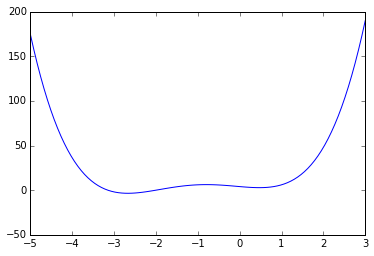

In [42]:
%matplotlib inline
fig, ax  = plt.subplots()
x = sp.linspace(-5, 3, 100)
ax.plot(x, f(x));

In [43]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 10


array([-2.67298167])

In [44]:
optimize.fmin_bfgs(f, 0.5)

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

In [45]:
optimize.brent(f)

0.46961743402759754

In [46]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

# 寻找函数解

In [62]:
omega_c = 3.0
def f(omega):
    # 一个超越方程： 共振频率
    return sp.tan(2*np.pi*omega) - omega_c/omega

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide


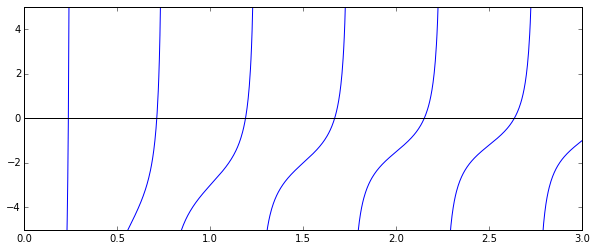

In [65]:
fig, ax  = plt.subplots(figsize=(10,4))
x = sp.linspace(0, 3, 1000)
y = f(x)
#mask = sp.where(abs(y) > 50)
mask = (abs(y) > 50)
x[mask] = y[mask] = sp.NaN # 当函数符号变化时放弃纵线
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [50]:
optimize.fsolve(f, 0.1)

(array([675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687,
        688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700,
        701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713,
        714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726,
        727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739,
        740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752,
        753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765,
        766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778,
        779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791,
        792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804,
        805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817,
        818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830,
        831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843,
        844, 845, 846, 847, 848, 849, 850, 851, 852

# 插值

In [66]:
from scipy.interpolate import *

In [70]:
def f(x):
    return sp.sin(x)

In [71]:
n = sp.arange(0, 10)  
x = sp.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * sp.randn(len(n)) # 模拟噪声
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

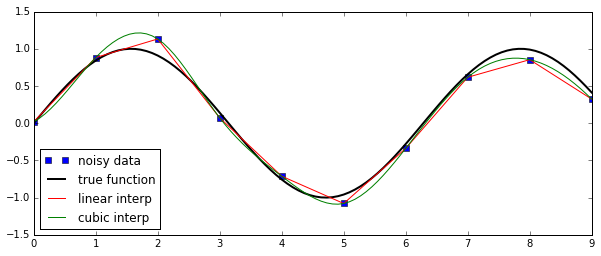

In [73]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3)

# 统计

In [74]:
from scipy import stats

(3.5, 1.8708286933869707, 3.5)

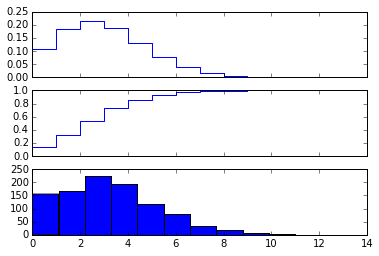

In [78]:
# 创建泊松分布（离散）的随机变量

X = stats.poisson(3.5) # n=3.5 光子的相干态分布
n = sp.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# 概率质量函数图 (PMF)
axes[0].step(n, X.pmf(n))

# 累积分布函数图 (CDF)
axes[1].step(n, X.cdf(n))

# 1000个随机变量X的柱状图
axes[2].hist(X.rvs(size=1000));
X.mean(), X.std(), X.var() # 泊松分布

(0.0, 1.0, 1.0)

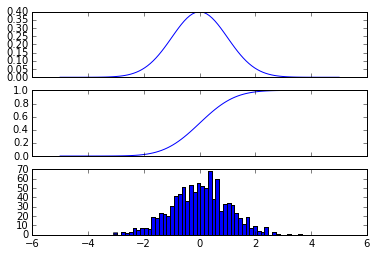

In [79]:
# 创建一个正态分布的随机变量（连续）
Y = stats.norm()

x = sp.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# 概率分布函数图 (PDF)
axes[0].plot(x, Y.pdf(x))

# 累积分布函数图 (CDF)
axes[1].plot(x, Y.cdf(x));

# 1000个随机变量Y的柱状图
axes[2].hist(Y.rvs(size=1000), bins=50);
Y.mean(), Y.std(), Y.var() # 正态分布

In [91]:
#统计检定
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))
print "t-statistic =", t_statistic
print "p-value =", p_value
print "上面采用了t-test检验了两组数据是否满足相同的分布，p值很大，表明两组数据具有\
相同的均值"

t-statistic = 0.0720913371839
p-value = 0.942536435659
上面采用了t-test检验了两组数据是否满足相同的分布，p值很大，表明两组数据具有相同的均值


In [94]:
print stats.ttest_1samp(Y.rvs(size=1000), 0.1)
print "低p值表明我们可以拒绝假设：Y的均值是0.1"
print 'Y.mean',Y.mean()

(-2.2258051725333354, 0.026249736229456661)
低p值表明我们可以拒绝假设：Y的均值是0.1
Y.mean 0.0
